Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.


<b>Loading Data and modules</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
data = pd.read_csv(Url)

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b> Variable description </b>

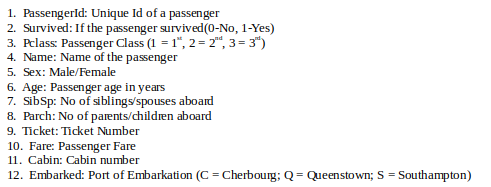

In [5]:
from IPython.display import Image
Image(filename='column_description3.png',width=800, height=400)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
report = ProfileReport(data)

In [8]:
report.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<b> Checking Null values </b>

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#removing nulls from age column

In [9]:
for i in data:
    age_avg = data['Age'].mean()
    age_std = data['Age'].std()
    age_null_count = data['Age'].isna().sum()
    age_null_random_list = np.random.randint(age_avg-age_std,age_avg+age_std,size = age_null_count)
    data.loc[data['Age'].isna(),'Age'] = age_null_random_list
    data['Age'] = data['Age'].astype(int)

In [10]:
data['Age'].isna().sum()

0

In [11]:
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [12]:
data['Family_size'] = data['SibSp']+data['Parch']+1

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.707071,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.532339,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

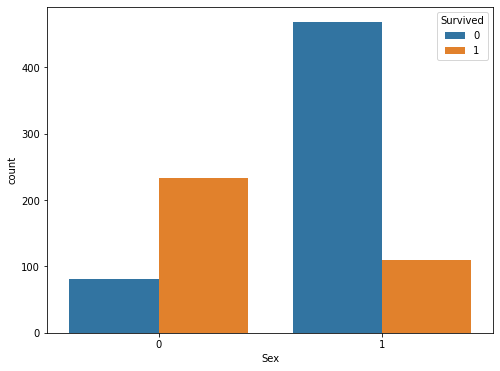

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data['Sex'],hue = 'Survived',data=data)

Female more likely to survive than male

In [15]:
data1 = data.groupby(['Sex']).agg(['mean','count','sum'])
data1['Survived']

,mean,count,sum
Sex,,,
0,0.742038,314,233
1,0.188908,577,109


In [16]:
print('% of woman survived',data[data['Sex']==0].Survived.sum()/data[data['Sex']==0].Survived.count())
print('% of man survived',data[data['Sex']==1].Survived.sum()/data[data['Sex']==1].Survived.count())

% of woman survived 0.7420382165605095
% of man survived 0.18890814558058924


In [17]:
data[data['Sex']==0].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
Family_size    314
dtype: int64

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

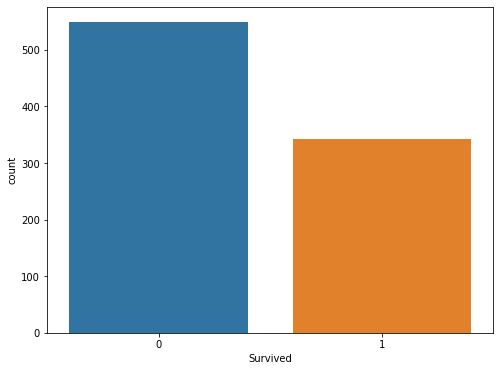

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data['Survived'])

In [19]:
print(data.Survived.sum()/data.Survived.count())

0.3838383838383838


more people died than survived (38% survived)

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Family_size', ylabel='count'>

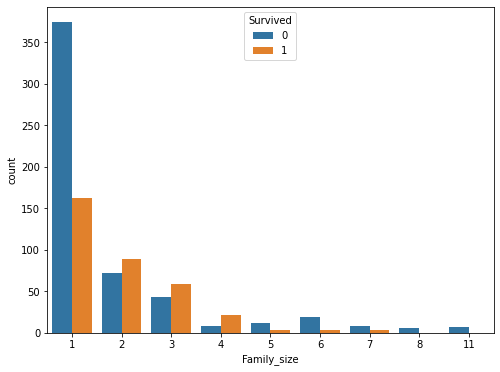

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data['Family_size'],hue = 'Survived',data=data)

In [21]:
data1 = data.groupby(['Family_size']).agg(['mean','count','sum'])
data1['Survived']

,mean,count,sum
Family_size,,,
1,0.303538,537,163
2,0.552795,161,89
3,0.578431,102,59
4,0.724138,29,21
5,0.200000,15,3
6,0.136364,22,3
7,0.333333,12,4
8,0.000000,6,0
11,0.000000,7,0


Less the family size more the survival increases

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

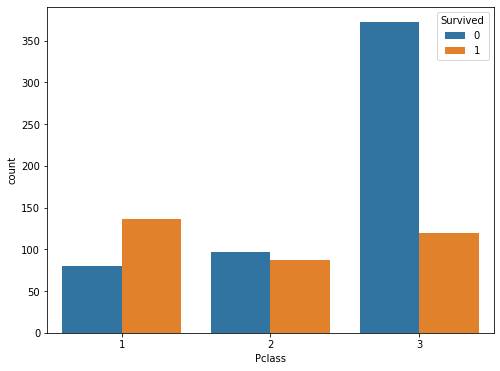

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(data['Pclass'],hue = 'Survived',data=data)

In [22]:
data1 = data.groupby(['Pclass']).agg(['mean','count','sum'])
data1['Survived']

,mean,count,sum
Pclass,,,
1,0.629630,216,136
2,0.472826,184,87
3,0.242363,491,119


1st class people has survived more than 2nd and 3rd

In [23]:
pd.crosstab(data.Pclass,data.Survived,margins = True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [24]:
print('% of survival in')
print('Pclass 1 : ',data[data['Pclass']==1].Survived.sum()/data[data['Pclass']==1].Survived.count())
print('Pclass 2 : ',data[data['Pclass']==2].Survived.sum()/data[data['Pclass']==2].Survived.count())
print('Pclass 3 : ',data[data['Pclass']==3].Survived.sum()/data[data['Pclass']==3].Survived.count())

% of survival in
Pclass 1 :  0.6296296296296297
Pclass 2 :  0.47282608695652173
Pclass 3 :  0.24236252545824846


In [25]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins = True).style.background_gradient(cmap='autumn_r')

we can see that almost all the women in pclass 1 and 2 survived
some men from plcass 1 survived whereas huge number of men died from pclass 2 and 3


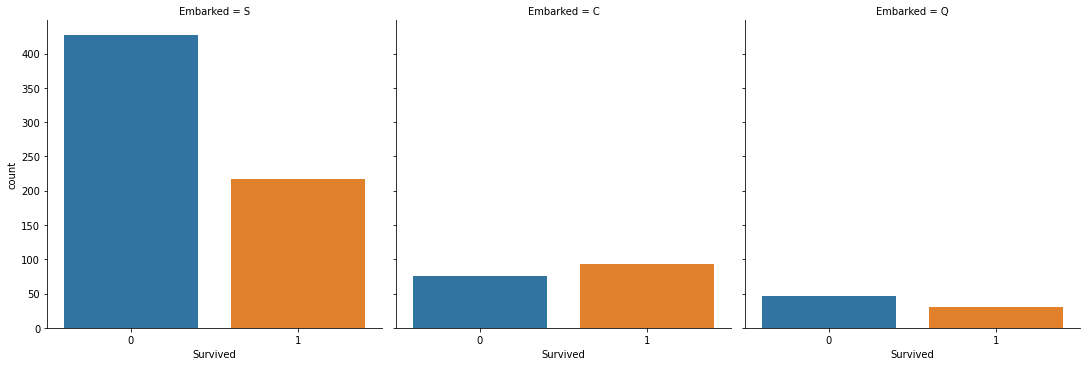

In [26]:
sns.catplot(x='Survived',col = 'Embarked',kind = 'count',data=data)

highest survival rate can be observed for 'S' and lowest for 'C'

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


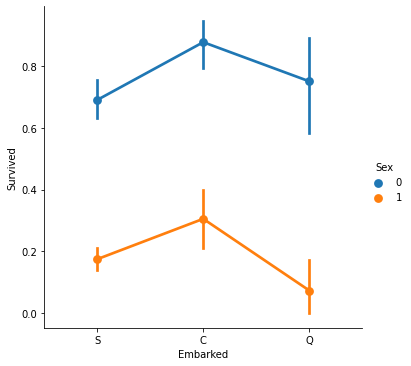

In [27]:
sns.catplot('Embarked','Survived',hue='Sex',kind = 'point',data=data)

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


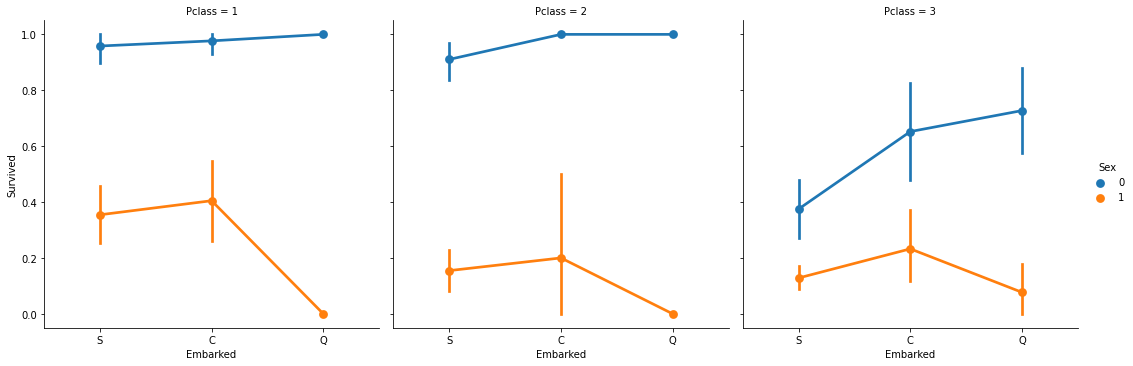

In [28]:
sns.catplot('Embarked','Survived',col = 'Pclass',hue='Sex',data=data,kind='point')



Embarked, Pclass and Sex :

Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.

All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2

For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4

survival rate for women in Pclass 3 is also low


In [29]:
pd.crosstab([data['Survived']],[data['Embarked'],data['Sex'],data['Pclass']],margins=True)

Embarked   C                     Q                    S                       \
Sex        0          1          0         1          0           1            
Pclass     1  2   3   1   2   3  1  2   3  1  2   3   1   2   3   1   2    3   
Survived                                                                       
0          1  0   8  25   8  33  0  0   9  1  1  36   2   6  55  51  82  231   
1         42  7  15  17   2  10  1  2  24  0  0   3  46  61  33  28  15   34   
All       43  7  23  42  10  43  1  2  33  1  1  39  48  67  88  79  97  265   

Embarked  All  
Sex            
Pclass         
Survived       
0         549  
1         340  
All       889

In [30]:
data['Age'].unique()

array([22, 38, 26, 35, 32, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 42, 34,
       15, 28,  8, 19, 33, 40, 23, 66, 21, 18,  3, 36, 24,  7, 49, 29, 65,
        5, 11, 45, 41, 17, 16, 25,  0, 30, 46, 59, 71, 37, 47, 70, 43, 12,
        9, 51, 44,  1, 61, 56, 50, 62, 52, 63, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [31]:
def age_group(age):
    if age<=10:
        return 1
    elif age<=20:
        return 2
    elif age<=30:
        return 3
    elif age<=40:
        return 4
    elif age<=50:
        return 5
    elif age<=60:
        return 6
    elif age<=70:
        return 7
    else:
        return 8

In [32]:
data['Age_group'] = data['Age'].apply(age_group)

Age_group Description:
    
1 : age between 0 and 10

2 : age between 11 and 20

3 : age between 21 and 30

4 : age between 31 and 40

5 : age between 40 and 50

6 : age between 51 and 60

7 : age between 61 and 70

8 : more than 71

In [33]:
pd.crosstab(data['Survived'],data['Age_group'],margins=True)

Age_group,1,2,3,4,5,6,7,8,All
Survived,,,,,,,,,
0,26,93,192,133,63,25,14,3,549
1,38,52,102,89,39,17,4,1,342
All,64,145,294,222,102,42,18,4,891


most of the people from age group 3 survived followed by group 4

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_group', ylabel='count'>

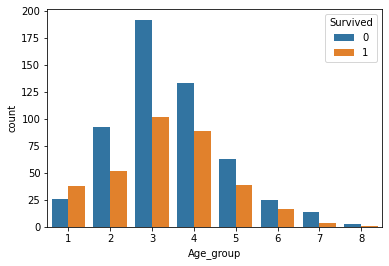

In [34]:
sns.countplot('Age_group',hue ='Survived',data = data)

In [35]:
pd.crosstab([data['Sex'],data['Survived']],[data['SibSp'],data['Pclass']],margins=True)

SibSp           0             1          2         3          4  5  8  All
Pclass          1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex Survived                                                              
0   0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
    1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
1   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
    1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All           137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891



For males, no survival rate above 0.5 for any values of SibSp. For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died. For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5


In [36]:
pd.crosstab([data.Sex, data.Survived], [data.Parch, data.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For females with Parch = 2 and Pclass = 3 survival rate is below 0.5
All females with Parch = 4 and Pclass = 3 died. All females with Parch > 4 died. (For females with Parch = 1 and Pclass = 3 survival rate is below 0.5) For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

In [37]:
for df in [data]:
    data['Fare_bin']=np.nan
    for i in range(12,0,-1):
        data.loc[ data['Fare'] <= i*50, 'Fare_bin'] = i

In [38]:
pd.crosstab([data.Sex, data.Survived], [data.Fare_bin, data.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [39]:
data1 = pd.get_dummies(data,columns = ['Pclass','Embarked','Sex'],drop_first=True)

In [40]:
data1.drop(columns = ['PassengerId','Name','Ticket', 'Cabin', 'Age_group', 'Fare_bin'],axis=1,inplace = True)

In [41]:
data1.head()

,Survived,Age,SibSp,Parch,Fare,Family_size,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_1
0,0,22,1,0,7.2500,2,0,1,0,1,1
1,1,38,1,0,71.2833,2,0,0,0,0,0
2,1,26,0,0,7.9250,1,0,1,0,1,0
3,1,35,1,0,53.1000,2,0,0,0,1,0
4,0,35,0,0,8.0500,1,0,1,0,1,1


In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    int32  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Family_size  891 non-null    int64  
 6   Pclass_2     891 non-null    uint8  
 7   Pclass_3     891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Sex_1        891 non-null    uint8  
dtypes: float64(1), int32(1), int64(4), uint8(5)
memory usage: 42.8 KB


In [43]:
corr = data1.corr()

<AxesSubplot:>

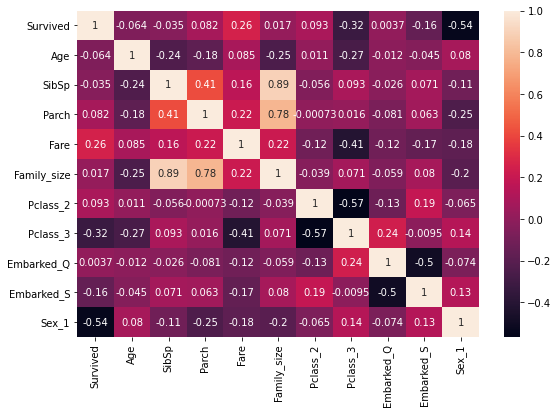

In [44]:
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True)

Survived and Fare positively correlated,

Survived and Sex_male negatively correlated.

Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated

<b> Modelling </b>

In [45]:
scaler = StandardScaler()
x,y = data1.drop(columns = ['Survived','Embarked_Q','Embarked_S','Family_size']),data1.Survived

In [46]:
x_scaled  = scaler.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_test_pred = clf.predict(x_test)

In [50]:
accuracy_score(y_test,y_test_pred)

0.7541899441340782

In [51]:
classification_rep = pd.DataFrame(classification_report(y_test,y_test_pred,output_dict= True))

In [52]:
classification_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.757009,0.750000,0.75419,0.753505,0.753877
recall,0.818182,0.675000,0.75419,0.746591,0.754190
f1-score,0.786408,0.710526,0.75419,0.748467,0.752494
support,99.000000,80.000000,0.75419,179.000000,179.000000


In [53]:
y_train_pred = clf.predict(x_train)

In [54]:
accuracy_score(y_train,y_train_pred)

0.9859550561797753

<b> Hyperparameter tuning </b>

In [55]:
path = clf.cost_complexity_pruning_path(x,y)

In [56]:
ccp_alpha = path.ccp_alphas
ccp_alpha = ccp_alpha[:85]

In [57]:
models = []
for ccp in ccp_alpha:
    model = DecisionTreeClassifier(ccp_alpha=ccp)
    model.fit(x_train,y_train)
    models.append(model)


In [58]:
models

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00018705574261129818),
 DecisionTreeClassifier(ccp_alpha=0.00022446689113355756),
 DecisionTreeClassifier(ccp_alpha=0.0002992891881780772),
 DecisionTreeClassifier(ccp_alpha=0.00033009836931405576),
 DecisionTreeClassifier(ccp_alpha=0.0003521049272683257),
 DecisionTreeClassifier(ccp_alpha=0.00037411148522259615),
 DecisionTreeClassifier(ccp_alpha=0.00037411148522259615),
 DecisionTreeClassifier(ccp_alpha=0.00037411148522259615),
 DecisionTreeClassifier(ccp_alpha=0.00037411148522259615),
 DecisionTreeClassifier(ccp_alpha=0.00037411148522259615),
 DecisionTreeClassifier(ccp_alpha=0.0004008337341670676),
 DecisionTreeClassifier(ccp_alpha=0.00044537081574118516),
 DecisionTreeClassifier(ccp_alpha=0.0004489337822671151),
 DecisionTreeClassifier(ccp_alpha=0.0005424616535727646),
 DecisionTreeClassifier(ccp_alpha=0.0005505791669313675),
 DecisionTreeClassifier(ccp_alpha=0.0005586731512657438),
 Decision

In [59]:
#select cpp alpha values where train and test accuracy are same or nearby same

In [60]:
train_score = [model.score(x_train,y_train)for model in models]    

In [61]:
test_score = [model.score(x_test,y_test)for model in models]    

In [62]:
train_score

[0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9859550561797753,
 0.9845505617977528,
 0.9845505617977528,
 0.9859550561797753,
 0.9845505617977528,
 0.9859550561797753,
 0.9803370786516854,
 0.9789325842696629,
 0.9803370786516854,
 0.9803370786516854,
 0.976123595505618,
 0.9775280898876404,
 0.9775280898876404,
 0.9691011235955056,
 0.9662921348314607,
 0.9648876404494382,
 0.9648876404494382,
 0.9691011235955056,
 0.9634831460674157,
 0.9662921348314607,
 0.9606741573033708,
 0.9606741573033708,
 0.9578651685393258,
 0.9662921348314607,
 0.96067415730

In [63]:
test_score

[0.7541899441340782,
 0.770949720670391,
 0.7653631284916201,
 0.7486033519553073,
 0.7541899441340782,
 0.7486033519553073,
 0.7821229050279329,
 0.7486033519553073,
 0.7486033519553073,
 0.7597765363128491,
 0.7318435754189944,
 0.7486033519553073,
 0.7430167597765364,
 0.7374301675977654,
 0.7430167597765364,
 0.7374301675977654,
 0.7318435754189944,
 0.7374301675977654,
 0.7653631284916201,
 0.7541899441340782,
 0.7374301675977654,
 0.7486033519553073,
 0.7486033519553073,
 0.7430167597765364,
 0.7486033519553073,
 0.7374301675977654,
 0.7486033519553073,
 0.7318435754189944,
 0.7262569832402235,
 0.7430167597765364,
 0.7430167597765364,
 0.7486033519553073,
 0.7653631284916201,
 0.7597765363128491,
 0.7653631284916201,
 0.7430167597765364,
 0.7486033519553073,
 0.7653631284916201,
 0.7430167597765364,
 0.7597765363128491,
 0.7374301675977654,
 0.776536312849162,
 0.7597765363128491,
 0.7597765363128491,
 0.7653631284916201,
 0.7597765363128491,
 0.7597765363128491,
 0.770949720670

In [64]:
#train,test score and ccp_alphas relation

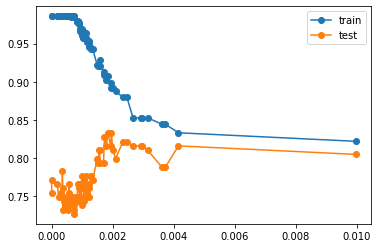

In [65]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha,train_score,marker= 'o',label = 'train')
ax.plot(ccp_alpha,test_score,marker='o',label = 'test')
ax.legend()

In [66]:
dt_model_ccp = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.01)

In [67]:
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [68]:
dt_model_ccp.score(x_train,y_train)

0.8216292134831461

In [69]:
dt_model_ccp.score(x_test,y_test)

0.8044692737430168

here we can clear see that there is negligible differnece in train n test score

In [70]:
y_pred_train = dt_model_ccp.predict(x_train)

In [71]:
y_pred_test = dt_model_ccp.predict(x_test)

In [72]:
accuracy_score(y_train,y_pred_train)

0.8216292134831461

In [73]:
accuracy_score(y_test,y_pred_test)

0.8044692737430168

<b> Save the model </b>

In [74]:
import pickle

In [147]:
pickle.dump(dt_model_ccp,open('titanicModel1.pickle','wb'))

In [156]:
model = pickle.load(open('titanicModel1.pickle','rb'))

In [75]:
x_train

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1
733,23,0,0,13.0000,1,0,1
857,51,0,0,26.5500,0,0,1
81,29,0,0,9.5000,0,1,1
319,40,1,1,134.5000,0,0,0
720,6,0,1,33.0000,1,0,0
...,...,...,...,...,...,...,...
575,19,0,0,14.5000,0,1,1
838,32,0,0,56.4958,0,1,1
337,41,0,0,134.5000,0,0,0
523,44,0,1,57.9792,0,0,0


In [177]:
y_train

733    0
857    1
81     1
319    1
720    1
      ..
575    0
838    1
337    1
523    1
863    0
Name: Survived, Length: 712, dtype: int64